## 워드 클라우드 - SOYNLP version

In [1]:
import re, joblib

In [2]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_txt = file.read()

In [5]:
gift_txt[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리

In [7]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ', gift_txt)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사 추출

In [9]:
# Konlpy에서는 from konlpy.tag import Oktl okt =  Okt(); okt.nouns(new_gift_text)
from soynlp.tokenizer import NounMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounMatchTokenizer(noun_scores)
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

15141

In [10]:
gift_list[:10]

['목걸이', '가디건', '모자', '어떠', '추천제품', '투척', '클래식', '커플', '버핏', '사이']

- 한글 폰트 사용

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

- 필요 없는 단어 제거

In [13]:
import nltk

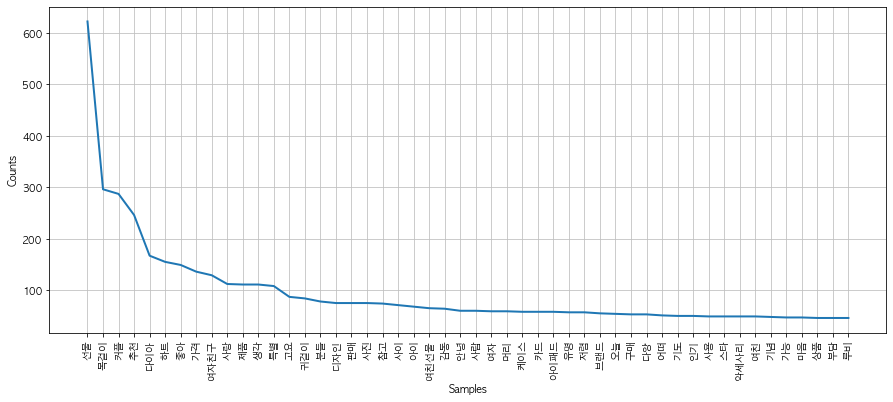

In [14]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)                # 많이 사용된 단어  50개 보여주기
plt.show()

In [ ]:
# stop_list = ['선물', '추천']
stopwords= '가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 한번 고급 커플 선물 추천'
stop_list = stopwords.split()
gift_list = [gift for gift in gift_list if gift not in stop_list]

In [ ]:
gl = []
for gift in gift_list:
    if gift not in stop_list:
        gl.append(gift)
gift_list = gl

- Wordcloud 그리기

In [18]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 241 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_11_0_arm64.whl size=153062 sha256=e40ebb9972ad2ae9aea6f8605fcf19023ae00490f89ea14a8834a4992a373434
  Stored in directory: /Users/kimhansaem/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [19]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

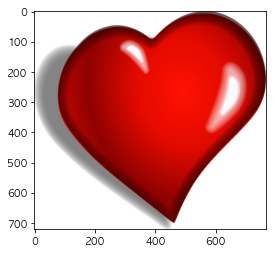

In [20]:
image = Image.open('data/heart.jpg')
plt.imshow(image)
plt.show()

In [21]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('선물', 622),
 ('목걸이', 296),
 ('커플', 287),
 ('추천', 246),
 ('다이아', 167),
 ('하트', 155),
 ('좋아', 149),
 ('가격', 136),
 ('여자친구', 129),
 ('사랑', 112)]

In [22]:
wc = WordCloud(
    font_path=':/Library/Fonts/AppleGothic',
    relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

- 하트 그림에 표시하기

In [24]:
from wordcloud import  ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [26]:
wc = WordCloud(
    font_path=':/Library/Fonts/AppleGothic',
    relative_scaling=0.2, background_color='white', mask=mask
).generate_from_frequencies(dict(data))
dafault_colors = wc.to_array()

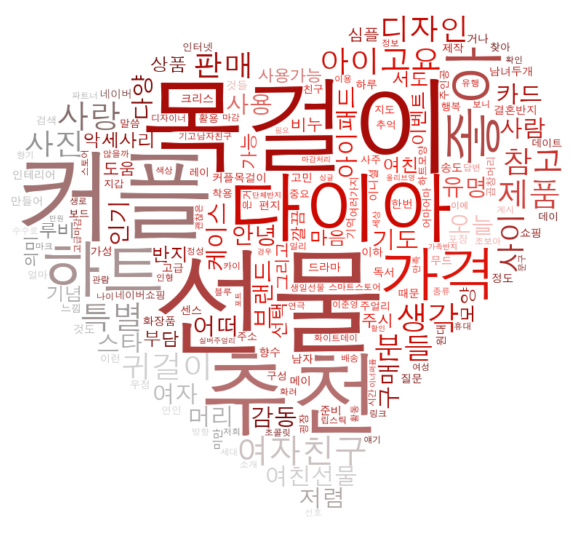

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()